In [6]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [12]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [16]:
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
y = pd.DataFrame(iris['target'], columns=['target'])

In [17]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [19]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [20]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  150 non-null    int32
dtypes: int32(1)
memory usage: 728.0 bytes


In [21]:
x.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
y.describe()

,target
count,150.000000
mean,1.000000
std,0.819232
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [28]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=62)
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [32]:
y_pred = model.predict(x_test)
y_pred

array([2, 2, 0, 0, 2, 2, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       2, 1, 2, 0, 2, 0, 2, 0])

In [33]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]


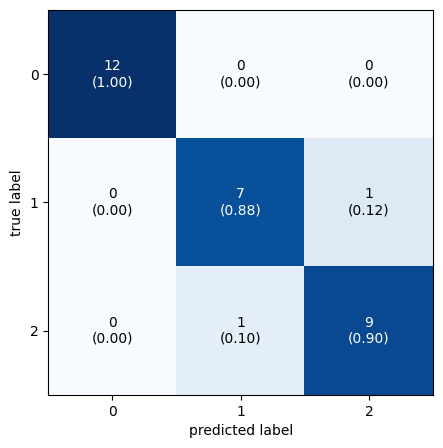

In [34]:
plot_confusion_matrix(conf_mat=cm,figsize=(5,5),show_normed=True)
plt.show()

In [35]:
print("TP:",cm[0,0])
print("TN:",cm[1,1]+cm[2,2])
print("FP:",cm[0,1]+cm[0,2])
print("FN:",cm[1,0]+cm[2,0])

TP: 12
TN: 16
FP: 0
FN: 0


In [37]:
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Error: ",1-accuracy_score(y_test,y_pred))
print("Precision Score: ",precision_score(y_test,y_pred,average='macro'))
print("Recall Score: ",recall_score(y_test,y_pred,average='macro'))

Accuracy:  0.9333333333333333
Error:  0.06666666666666665
Precision Score:  0.9249999999999999
Recall Score:  0.9249999999999999
